In [1]:
import pandas as pd

# Tạo tập dữ liệu từ bảng trong ảnh
data = {
    'Love Math': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Love Art':  ['Yes', 'No',  'Yes', 'Yes', 'Yes', 'No',  'No'],
    'Age':       [7,     12,    18,    35,    38,    50,    83],
    'Love AI':   ['No',  'No',  'No',  'Yes', 'Yes', 'No',  'No']
}

df = pd.DataFrame(data)
df


,Love Math,Love Art,Age,Love AI
0,Yes,Yes,7,No
1,Yes,No,12,No
2,No,Yes,18,No
3,No,Yes,35,Yes
4,Yes,Yes,38,Yes
5,Yes,No,50,No
6,No,No,83,No


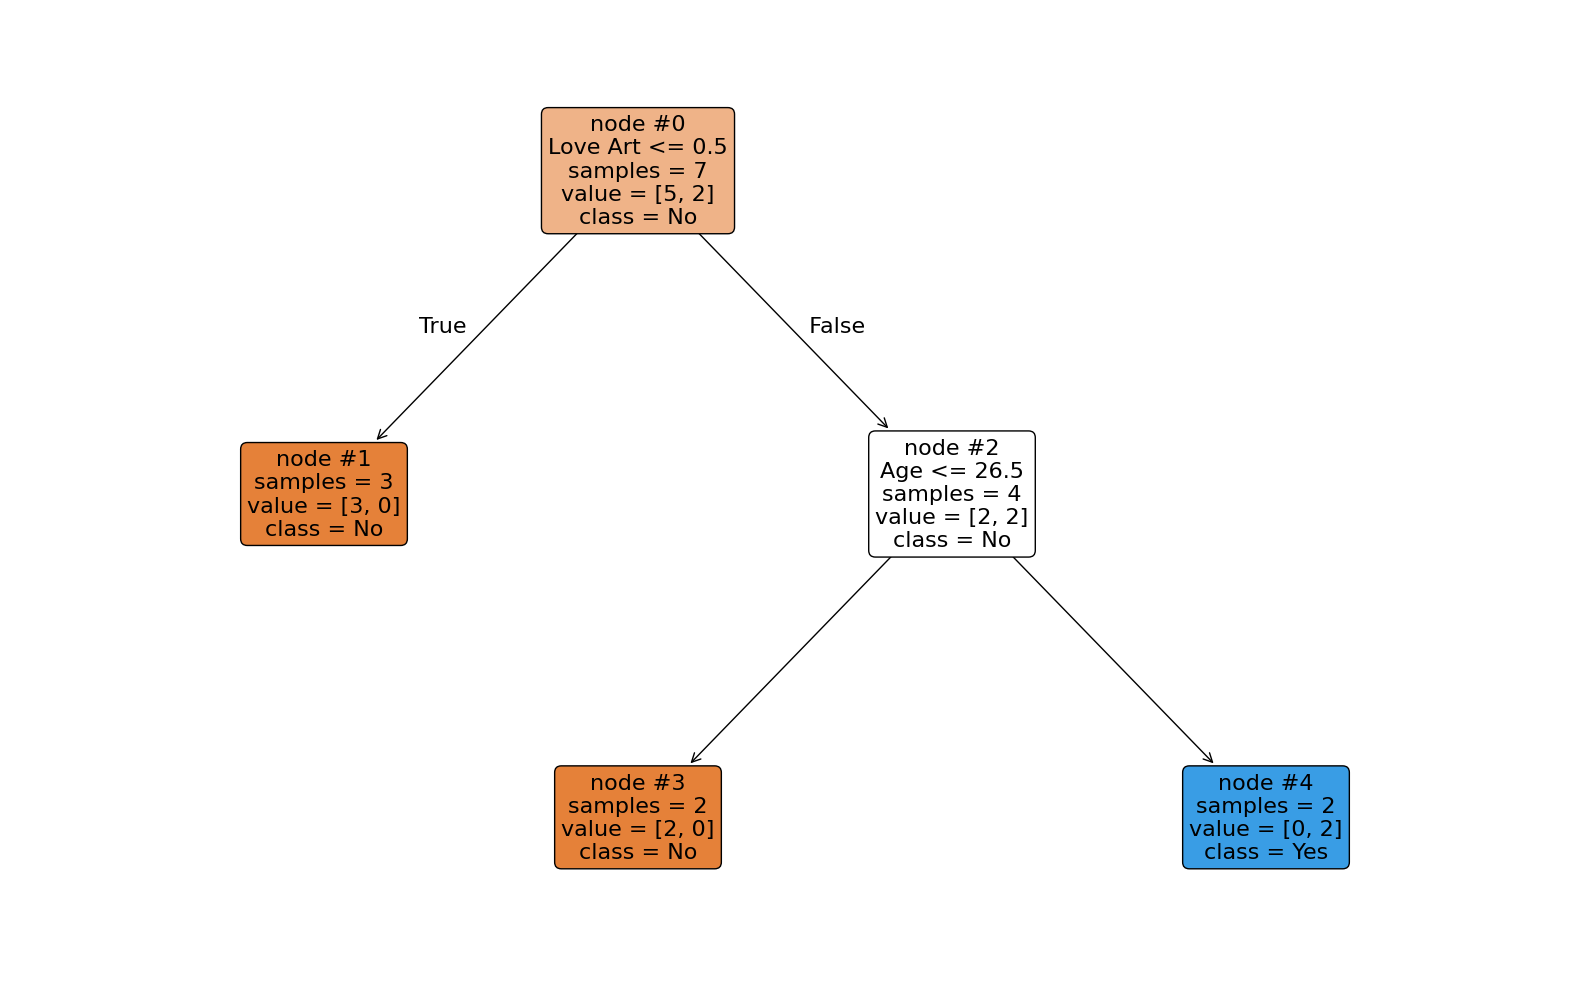

In [3]:
from sklearn import tree
import matplotlib.pyplot as plt

# Chuyển đổi các giá trị Yes/No thành số để huấn luyện mô hình
df_encoded = df.copy()
for col in ['Love Math', 'Love Art', 'Love AI']:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})

# Đặc trưng và nhãn
X = df_encoded[['Love Math', 'Love Art', 'Age']]
y = df_encoded['Love AI']

# Huấn luyện cây quyết định
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, y)

# Vẽ cây quyết định dãn ra cho đẹp dễ đọc
plt.figure(figsize=(16, 10))  # Tăng kích thước hình
tree.plot_tree(
    clf, 
    feature_names=['Love Math', 'Love Art', 'Age'], 
    class_names=['No', 'Yes'], 
    filled=True, 
    rounded=True,
    fontsize=16,              # Tăng cỡ chữ
    proportion=False,         # Không co lại các node
    precision=2,              # Làm tròn số cho gọn
    impurity=False,           # Ẩn chỉ số impurity cho gọn
    label='all',              # Hiện cả giá trị và class
    node_ids=True,            # Hiện ID node cho dễ theo dõi
)
plt.tight_layout()            # Dãn layout cho đỡ chồng lấn
plt.show()


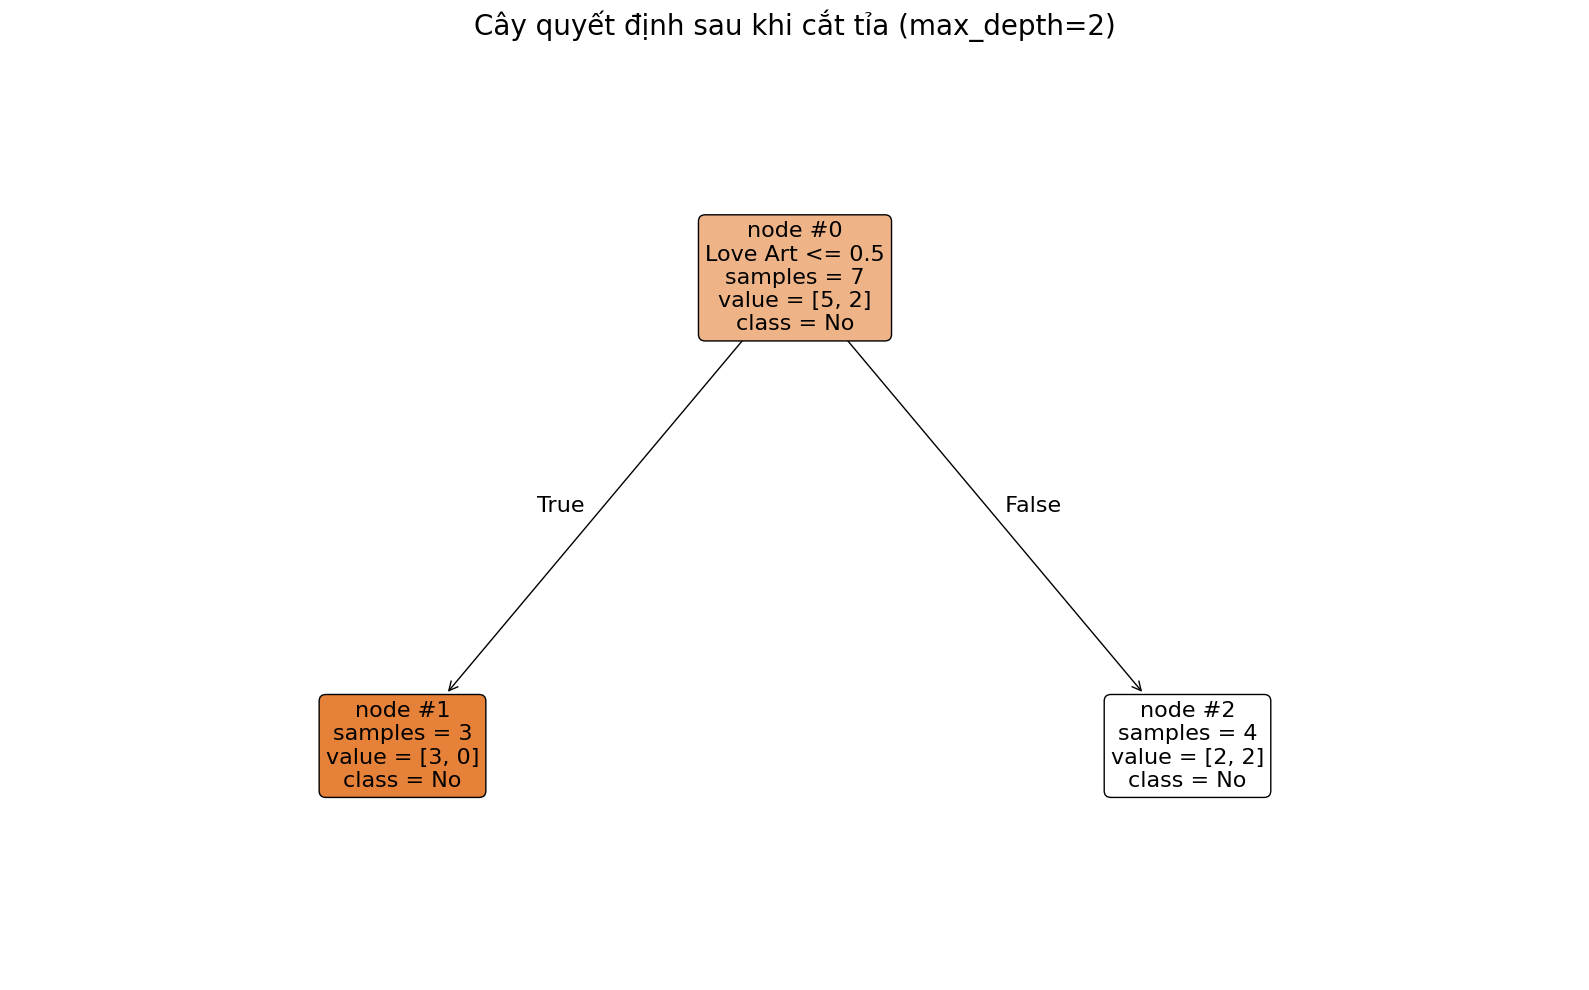

In [5]:
# Cắt tỉa cây quyết định bằng cách giới hạn độ sâu (max_depth)
pruned_clf = tree.DecisionTreeClassifier(max_depth=1, random_state=0)
pruned_clf = pruned_clf.fit(X, y)

# Vẽ lại cây quyết định sau khi cắt tỉa
plt.figure(figsize=(16, 10))
tree.plot_tree(
    pruned_clf, 
    feature_names=['Love Math', 'Love Art', 'Age'], 
    class_names=['No', 'Yes'], 
    filled=True, 
    rounded=True,
    fontsize=16,
    proportion=False,
    precision=2,
    impurity=False,
    label='all',
    node_ids=True,
)
plt.title("Cây quyết định sau khi cắt tỉa (max_depth=2)", fontsize=20)
plt.tight_layout()
plt.show()


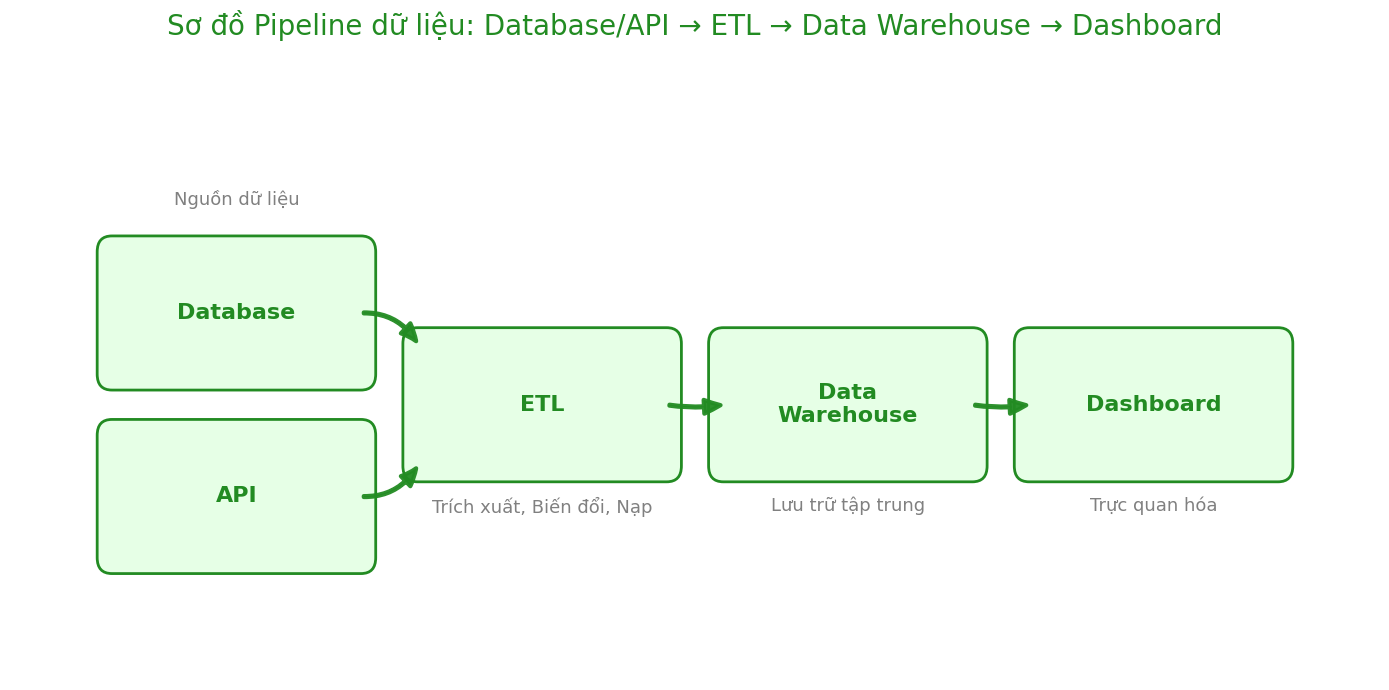

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Màu royal green
ROYAL_GREEN = "#228B22"
BOX_COLOR = "#e6ffe6"
ARROW_COLOR = ROYAL_GREEN

fig, ax = plt.subplots(figsize=(14, 7))
ax.axis('off')

# Định nghĩa các box: tất cả cùng kích thước, cách đều, label xuống dòng thủ công nếu cần
box_width = 2.2
box_height = 1.0
x_gap = 2.7
y_center = 0

boxes = [
    {"label": "Database", "xy": (0 * x_gap, y_center)},
    {"label": "API", "xy": (0 * x_gap, y_center - 1.5)},
    {"label": "ETL", "xy": (1 * x_gap, y_center - 0.75)},
    {"label": "Data\nWarehouse", "xy": (2 * x_gap, y_center - 0.75)},
    {"label": "Dashboard", "xy": (3 * x_gap, y_center - 0.75)},
]

# Vẽ các box với kích thước bằng nhau, căn đều
for box in boxes:
    x, y = box["xy"]
    rect = patches.FancyBboxPatch(
        (x - box_width/2, y - box_height/2), box_width, box_height,
        boxstyle="round,pad=0.13", linewidth=2, edgecolor=ROYAL_GREEN, facecolor=BOX_COLOR
    )
    ax.add_patch(rect)
    ax.text(
        x, y, box["label"], ha="center", va="center",
        fontsize=16, fontweight="bold", color=ROYAL_GREEN,
        wrap=True, linespacing=1.2
    )

# Hàm vẽ mũi tên cong mượt mà
def draw_curved_arrow(ax, start, end, rad=0.2, color=ARROW_COLOR, lw=3):
    style = "Simple,tail_width=0.7,head_width=10,head_length=12"
    arrow = patches.FancyArrowPatch(
        start, end, connectionstyle=f"arc3,rad={rad}",
        arrowstyle=style, color=color, linewidth=lw, alpha=0.95
    )
    ax.add_patch(arrow)

# Database → ETL (cong xuống)
draw_curved_arrow(ax, (0 + box_width/2, y_center), (1 * x_gap - box_width/2, y_center - 0.75 + box_height/2), rad=-0.3)
# API → ETL (cong lên)
draw_curved_arrow(ax, (0 + box_width/2, y_center - 1.5), (1 * x_gap - box_width/2, y_center - 0.75 - box_height/2), rad=0.3)
# ETL → Data Warehouse (thẳng, hơi cong)
draw_curved_arrow(ax, (1 * x_gap + box_width/2, y_center - 0.75), (2 * x_gap - box_width/2, y_center - 0.75), rad=0.08)
# Data Warehouse → Dashboard (thẳng, hơi cong)
draw_curved_arrow(ax, (2 * x_gap + box_width/2, y_center - 0.75), (3 * x_gap - box_width/2, y_center - 0.75), rad=0.08)

# Ghi chú các bước (căn đều theo các box)
ax.text(0, y_center + box_height/2 + 0.35, "Nguồn dữ liệu", ha="center", va="bottom", fontsize=13, color="gray")
ax.text(1 * x_gap, y_center - 0.75 - box_height/2 - 0.25, "Trích xuất, Biến đổi, Nạp", ha="center", va="top", fontsize=13, color="gray")
ax.text(2 * x_gap, y_center - 0.75 - box_height/2 - 0.25, "Lưu trữ tập trung", ha="center", va="top", fontsize=13, color="gray")
ax.text(3 * x_gap, y_center - 0.75 - box_height/2 - 0.25, "Trực quan hóa", ha="center", va="top", fontsize=13, color="gray")

plt.title("Sơ đồ Pipeline dữ liệu: Database/API → ETL → Data Warehouse → Dashboard", fontsize=20, pad=24, color=ROYAL_GREEN)
plt.xlim(-2, 3 * x_gap + 2)
plt.ylim(-3, 2)
plt.tight_layout()
plt.show()


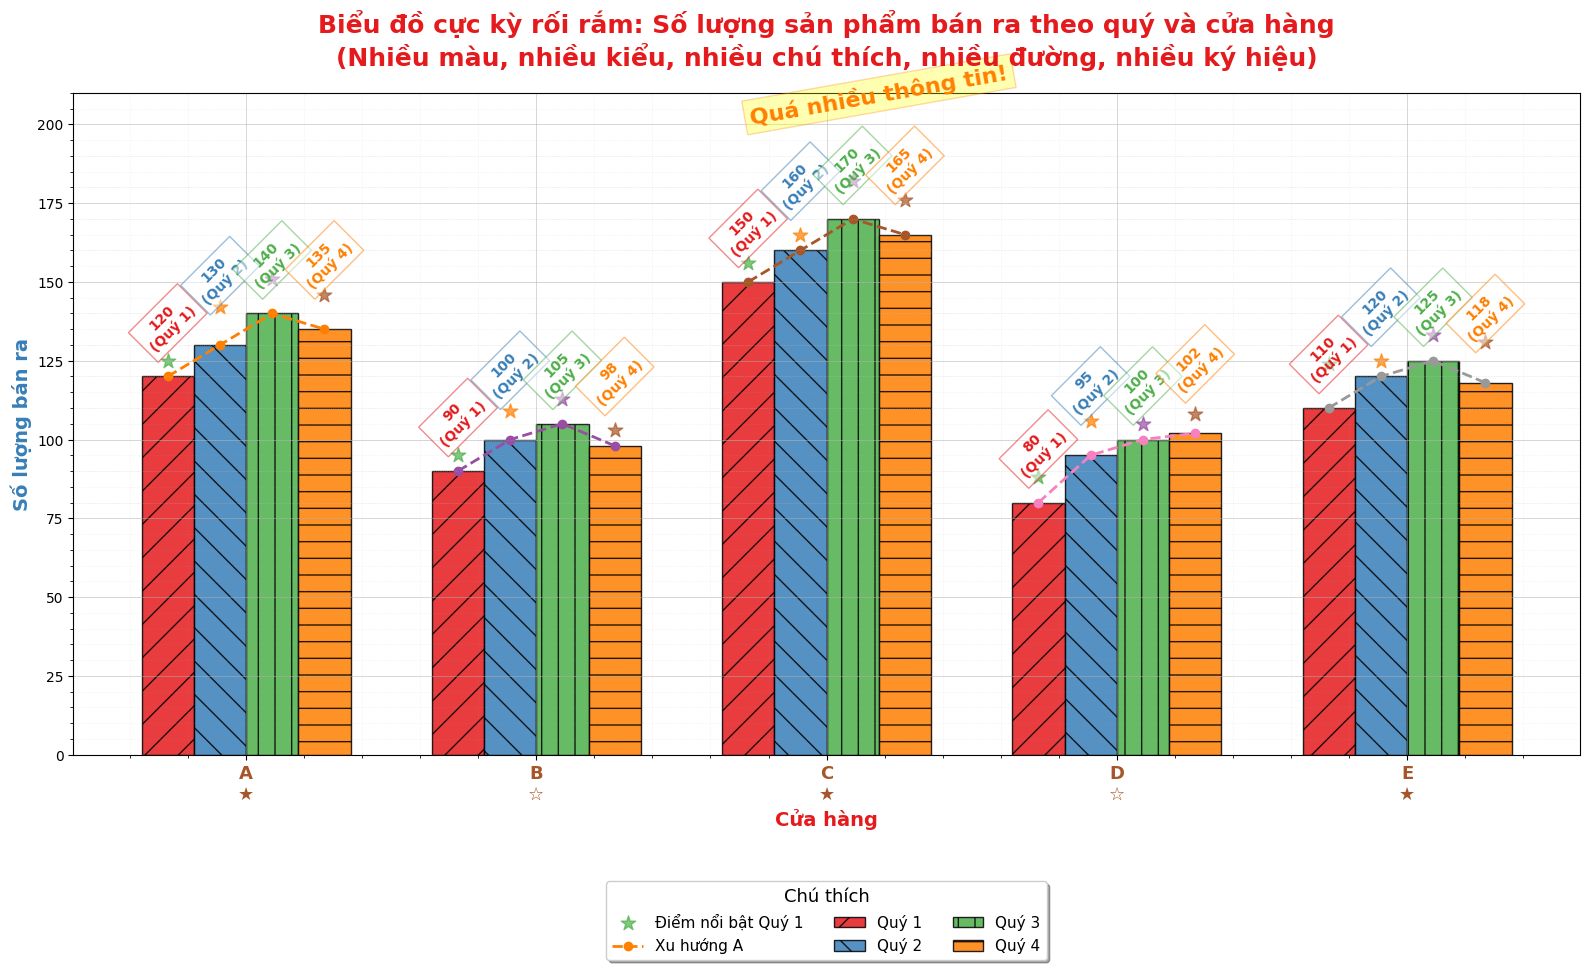

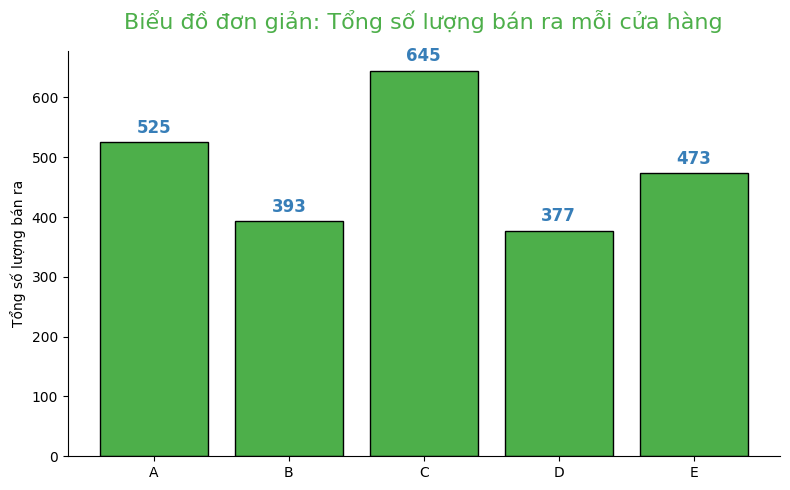

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Tạo dữ liệu thực tế vừa phải
data = {
    "Cửa hàng": ["A", "B", "C", "D", "E"],
    "Quý 1": [120, 90, 150, 80, 110],
    "Quý 2": [130, 100, 160, 95, 120],
    "Quý 3": [140, 105, 170, 100, 125],
    "Quý 4": [135, 98, 165, 102, 118]
}
df = pd.DataFrame(data)

# ----------------- Biểu đồ cực kỳ rối rắm -----------------
fig, ax = plt.subplots(figsize=(16, 10))
bar_width = 0.18
x = np.arange(len(df["Cửa hàng"]))

# Nhiều màu, nhiều pattern, nhiều kiểu marker
colors = ["#e41a1c", "#377eb8", "#4daf4a", "#ff7f00", "#984ea3", "#a65628", "#f781bf", "#999999"]
hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O']

# Vẽ cột cho từng quý, mỗi cột một màu và pattern khác nhau
for i, quarter in enumerate(["Quý 1", "Quý 2", "Quý 3", "Quý 4"]):
    ax.bar(x + i*bar_width, df[quarter], width=bar_width, label=quarter, 
           color=colors[i % len(colors)], edgecolor="black", hatch=hatch_patterns[i % len(hatch_patterns)], alpha=0.85)

# Thêm scatter plot lên trên các cột
for i, quarter in enumerate(["Quý 1", "Quý 2", "Quý 3", "Quý 4"]):
    ax.scatter(x + i*bar_width, df[quarter] + np.random.randint(5, 15, size=len(df)), 
               color=colors[(i+2) % len(colors)], marker='*', s=120, label=f"Điểm nổi bật {quarter}" if i==0 else "", alpha=0.7)

# Thêm đường nối các điểm của từng cửa hàng qua các quý
for idx in range(len(df["Cửa hàng"])):
    y_vals = [df[q][idx] for q in ["Quý 1", "Quý 2", "Quý 3", "Quý 4"]]
    ax.plot(x[idx] + np.arange(4)*bar_width, y_vals, color=colors[(idx+3)%len(colors)], linestyle='--', linewidth=2, marker='o', label=f"Xu hướng {df['Cửa hàng'][idx]}" if idx==0 else "")

# Thêm nhiều chú thích, nhãn, ký hiệu, mũi tên
for i in range(len(df["Cửa hàng"])):
    for j, quarter in enumerate(["Quý 1", "Quý 2", "Quý 3", "Quý 4"]):
        ax.text(x[i] + j*bar_width, df[quarter][i] + 7 + (j%2)*5, 
                f"{df[quarter][i]}\n({quarter})", ha='center', va='bottom', fontsize=10, rotation=45, color=colors[j%len(colors)], fontweight="bold", bbox=dict(facecolor='white', alpha=0.5, edgecolor=colors[j%len(colors)]))

# Thêm grid dày đặc
ax.grid(True, which='major', linestyle='-', linewidth=0.7, alpha=0.5)
ax.grid(True, which='minor', linestyle=':', linewidth=0.4, alpha=0.3)
ax.minorticks_on()

# Thêm nhiều đường tham chiếu ngang
for y in range(80, 201, 10):
    ax.axhline(y, color="#cccccc", linestyle=':', linewidth=0.5, alpha=0.4)

# Thêm các ký hiệu đặc biệt trên trục x
ax.set_xticks(x + 1.5*bar_width)
ax.set_xticklabels([f"{c}\n★" if i%2==0 else f"{c}\n☆" for i, c in enumerate(df["Cửa hàng"])], fontsize=13, color="#a65628", fontweight="bold")

# Thêm nhãn trục, tiêu đề, phụ đề, chú thích phụ
ax.set_ylabel("Số lượng bán ra", fontsize=14, color="#377eb8", fontweight="bold")
ax.set_xlabel("Cửa hàng", fontsize=14, color="#e41a1c", fontweight="bold")
ax.set_title("Biểu đồ cực kỳ rối rắm: Số lượng sản phẩm bán ra theo quý và cửa hàng\n(Nhiều màu, nhiều kiểu, nhiều chú thích, nhiều đường, nhiều ký hiệu)", 
             fontsize=18, color="#e41a1c", pad=20, fontweight="bold")
ax.text(2, 200, "Quá nhiều thông tin!", fontsize=16, color="#ff7f00", fontweight="bold", rotation=10, bbox=dict(facecolor='yellow', alpha=0.3, edgecolor="#ff7f00"))

# Thêm legend với nhiều cột, vị trí lạ
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.18), ncol=3, fontsize=11, title="Chú thích", title_fontsize=13, frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

# ----------------- Biểu đồ đơn giản để so sánh -----------------
df["Tổng"] = df[["Quý 1", "Quý 2", "Quý 3", "Quý 4"]].sum(axis=1)
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(df["Cửa hàng"], df["Tổng"], color="#4daf4a", edgecolor="black")

# Thêm nhãn rõ ràng trên đầu cột
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 4),  # 4 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12, fontweight="bold", color="#377eb8")

ax.set_ylabel("Tổng số lượng bán ra")
ax.set_title("Biểu đồ đơn giản: Tổng số lượng bán ra mỗi cửa hàng", fontsize=16, color="#4daf4a", pad=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


,Tháng,Trước chiến dịch (VND),Sau chiến dịch (VND)
0,Tháng 1,529934000,585323000
1,Tháng 2,517235000,537908000
2,Tháng 3,532954000,542052000
3,Tháng 4,550461000,567630000
4,Tháng 5,515317000,557718000
5,Tháng 6,515317000,586913000
6,Tháng 7,551584000,560023000
7,Tháng 8,535349000,548929000
8,Tháng 9,510611000,612244000
9,Tháng 10,530851000,575033000


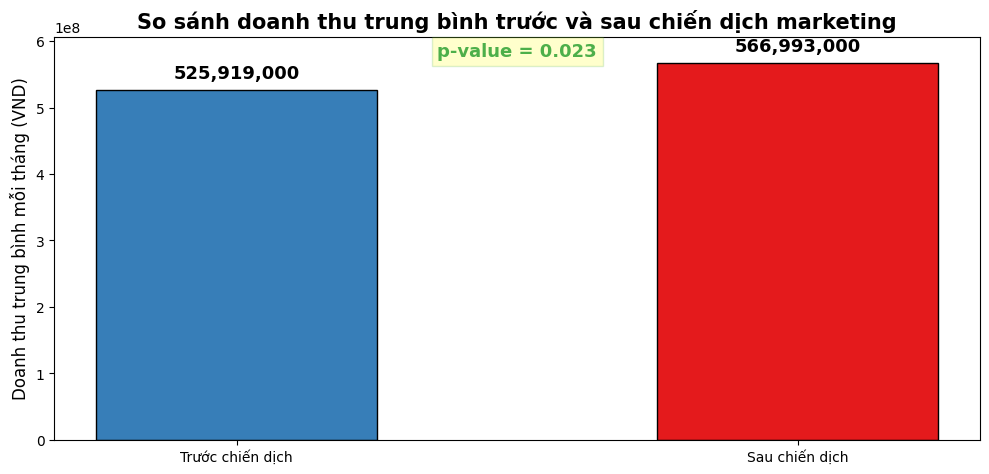

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tạo số liệu ví dụ kinh doanh (làm tròn đến ngàn, ví dụ 523.256.000)
np.random.seed(42)
doanh_thu_truoc = np.random.normal(loc=520_000_000, scale=20_000_000, size=12)
doanh_thu_truoc = np.round(doanh_thu_truoc, -3)  # làm tròn đến ngàn

doanh_thu_sau = np.random.normal(loc=580_000_000, scale=22_000_000, size=12)
doanh_thu_sau = np.round(doanh_thu_sau, -3)  # làm tròn đến ngàn

# Tạo bảng dữ liệu
thang = [f"Tháng {i+1}" for i in range(12)]
df_doanhthu = pd.DataFrame({
    "Tháng": thang,
    "Trước chiến dịch (VND)": doanh_thu_truoc.astype(int),
    "Sau chiến dịch (VND)": doanh_thu_sau.astype(int)
})

# Hiển thị bảng dữ liệu
display(df_doanhthu)

# Tính trung bình (làm tròn đến ngàn)
mean_truoc = int(np.round(doanh_thu_truoc.mean(), -3))
mean_sau = int(np.round(doanh_thu_sau.mean(), -3))

# Biểu đồ cột so sánh doanh thu trung bình trước và sau chiến dịch
labels = ['Trước chiến dịch', 'Sau chiến dịch']
means = [mean_truoc, mean_sau]
colors = ['#377eb8', '#e41a1c']

plt.figure(figsize=(10,5))
bars = plt.bar(labels, means, color=colors, edgecolor='black', width=0.5)

# Thêm giá trị trên đầu cột (dạng 523,256,000)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height):,}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 6),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=13, fontweight='bold')

# Chú thích p-value
p_value = 0.023
plt.text(0.5, max(means)+10_000_000, f'p-value = {p_value:.3f}', ha='center', fontsize=13, color='#4daf4a', fontweight='bold', bbox=dict(facecolor='yellow', alpha=0.2, edgecolor='#4daf4a'))

plt.ylabel("Doanh thu trung bình mỗi tháng (VND)", fontsize=12)
plt.title("So sánh doanh thu trung bình trước và sau chiến dịch marketing", fontsize=15, fontweight='bold')
plt.ylim(0, max(means)+40_000_000)
plt.tight_layout()
plt.show()






In [22]:
# Tạo bảng dữ liệu giá cổ phiếu Microsoft (MSFT) dựa trên hình ảnh hướng dẫn

data_msft = {
    "Date": [
        "2023-08-18", "2023-08-17", "2023-08-16", "2023-08-15", "2023-08-14",
        "2023-08-11", "2023-08-10", "2023-08-09", "2023-08-08", "2023-08-07"
    ],
    "Open": [
        320.799988, 326.440002, 314.489990, 317.999939, 327.820007,
        326.820007, 321.470001, 324.579987, 326.670013, 328.670013
    ],
    "High": [
        324.420013, 327.489990, 317.489990, 322.179993, 328.489990,
        327.489990, 324.579987, 326.489990, 328.489990, 329.489990
    ],
    "Low": [
        318.799988, 316.019989, 309.529999, 317.040009, 322.549988,
        323.549988, 319.549988, 321.549988, 323.549988, 324.549988
    ],
    "Close": [
        320.399994, 316.880005, 316.480011, 317.649994, 323.649994,
        324.799988, 322.529999, 323.799988, 324.799988, 326.799988
    ],
    "Adj Close": [
        320.399994, 316.880005, 316.480011, 317.649994, 323.649994,
        324.799988, 322.529999, 323.799988, 324.799988, 326.304657
    ],
    "Volume": [
        20869800, 21527800, 24740800, 24040000, 19448000,
        18414000, 21681600, 18164800, 15201200, 15201200
    ]
}

df_msft = pd.DataFrame(data_msft)
display(df_msft)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-18,320.799988,324.420013,318.799988,320.399994,320.399994,20869800
1,2023-08-17,326.440002,327.489990,316.019989,316.880005,316.880005,21527800
2,2023-08-16,314.489990,317.489990,309.529999,316.480011,316.480011,24740800
3,2023-08-15,317.999939,322.179993,317.040009,317.649994,317.649994,24040000
4,2023-08-14,327.820007,328.489990,322.549988,323.649994,323.649994,19448000
5,2023-08-11,326.820007,327.489990,323.549988,324.799988,324.799988,18414000
6,2023-08-10,321.470001,324.579987,319.549988,322.529999,322.529999,21681600
7,2023-08-09,324.579987,326.489990,321.549988,323.799988,323.799988,18164800
8,2023-08-08,326.670013,328.489990,323.549988,324.799988,324.799988,15201200
9,2023-08-07,328.670013,329.489990,324.549988,326.799988,326.304657,15201200


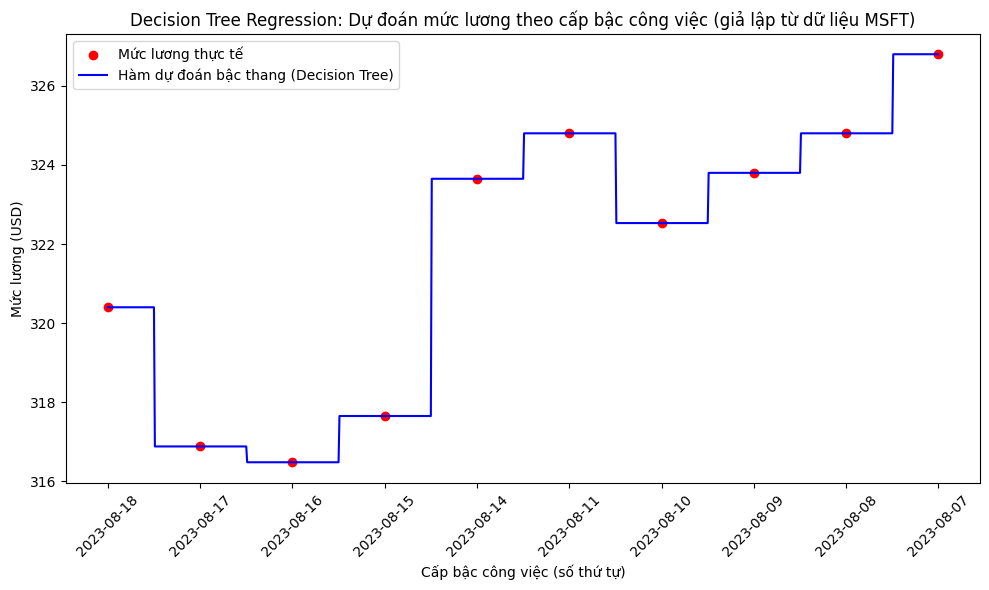

In [24]:
# Ví dụ mô hình Decision Tree Regression sử dụng dữ liệu giá cổ phiếu MSFT

from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Ví dụ mô hình Decision Tree Regression cho dự đoán mức lương theo vị trí công việc sử dụng data msft.
# Ở đây, ta giả sử "ngày" là "cấp bậc công việc" và "giá đóng cửa" là "mức lương".

# Chuyển ngày thành số thứ tự để làm biến đầu vào (giả lập cấp bậc công việc)
X = np.arange(len(df_msft)).reshape(-1, 1)  # 0, 1, ..., 9 cho 10 cấp bậc
y = df_msft["Close"].values  # Mức lương giả lập

# Khởi tạo và huấn luyện mô hình Decision Tree Regression
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# Dự đoán mức lương cho các cấp bậc chi tiết hơn để vẽ hàm bậc thang (piecewise constant function)
X_grid = np.arange(0, len(df_msft)-1+0.01, 0.01).reshape(-1, 1)
y_pred = regressor.predict(X_grid)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Mức lương thực tế')
plt.plot(X_grid, y_pred, color='blue', label='Hàm dự đoán bậc thang (Decision Tree)')
plt.title('Decision Tree Regression: Dự đoán mức lương theo cấp bậc công việc (giả lập từ dữ liệu MSFT)')
plt.xlabel('Cấp bậc công việc (số thứ tự)')
plt.ylabel('Mức lương (USD)')
plt.xticks(ticks=np.arange(len(df_msft)), labels=df_msft["Date"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


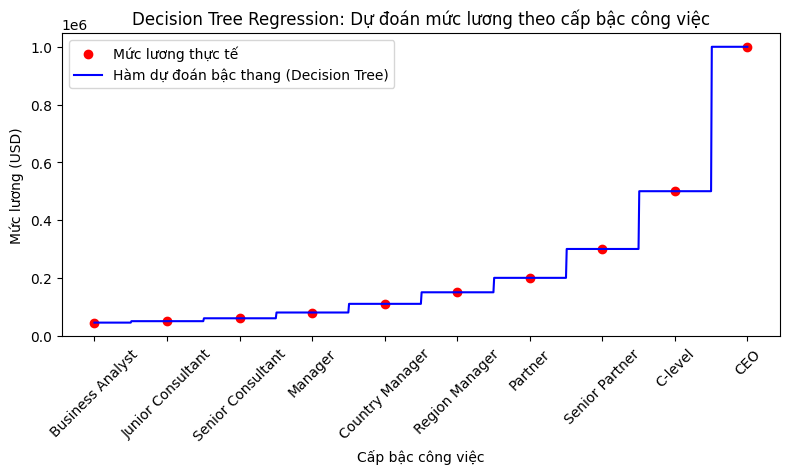

In [25]:
# Lấy dữ liệu đúng theo bảng Position_Salaries trong ảnh

from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Tạo DataFrame theo bảng Position_Salaries
data = {
    "Position": [
        "Business Analyst", "Junior Consultant", "Senior Consultant", "Manager",
        "Country Manager", "Region Manager", "Partner", "Senior Partner",
        "C-level", "CEO"
    ],
    "Level": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Salary": [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]
}
df = pd.DataFrame(data)

# Chuẩn bị dữ liệu cho mô hình
X = df["Level"].values.reshape(-1, 1)
y = df["Salary"].values

# Khởi tạo và huấn luyện mô hình Decision Tree Regression
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X, y)

# Tạo dữ liệu chi tiết hơn để vẽ hàm bậc thang
X_grid = np.arange(1, 10.01, 0.01).reshape(-1, 1)
y_pred = reg.predict(X_grid)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label='Mức lương thực tế')
plt.plot(X_grid, y_pred, color='blue', label='Hàm dự đoán bậc thang (Decision Tree)')
plt.title('Decision Tree Regression: Dự đoán mức lương theo cấp bậc công việc')
plt.xlabel('Cấp bậc công việc')
plt.ylabel('Mức lương (USD)')
plt.xticks(ticks=df["Level"], labels=df["Position"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

